In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib.ticker as mticker
import numpy as np

import uproot
import awkward as ak
from coffea import nanoevents
from coffea.nanoevents.methods.base import NanoEventsArray
from coffea.analysis_tools import Weights, PackedSelection
from coffea.nanoevents.methods import nanoaod
from coffea.nanoevents.methods import vector
from coffea.lookup_tools.dense_lookup import dense_lookup

plt.style.use(hep.style.CMS)
hep.style.use("CMS")
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))
plt.rcParams.update({"font.size": 16})

tests on accesssing generator info from nanoAOD (old and bad)

In [2]:
events = nanoevents.NanoEventsFactory.from_root(
    # "../../../../data/2017_UL_nano/NMSSM_XToYH_MX1000_MY400_HTo2bYTo2W_hadronicDecay/nano_mc2017_101.root",
    # "../../../../data/2017_UL_nano/NMSSM_XToYHTo2W2BTo4Q2B_MX-3000_MY-190/nano_mc2016pre_13.root",
    # "/eos/uscms//store/user/lpcpfnano/rkansal/v2_3/2016APV/XHY/NMSSM_XToYHTo2W2BTo4Q2B_MX-3000_MY-190_TuneCP5_13TeV-madgraph-pythia8/NMSSM_XToYHTo2W2BTo4Q2B_MX-3000_MY-190/230323_173705/0000/nano_mc2016pre_13.root",
    # "/eos/uscms//store/user/lpcpfnano/rkansal/v2_3/2016/XHY/NMSSM_XToYHTo2W2BTo4Q2B_MX-3000_MY-190_TuneCP5_13TeV-madgraph-pythia8/NMSSM_XToYHTo2W2BTo4Q2B_MX-3000_MY-190/230323_193051/0000/nano_mc2016post_1-3.root",
    "nano_mc2018_1-1.root",
    schemaclass=nanoevents.NanoAODSchema,
).events()

Z_PDGID = 23
W_PDGID = 24
HIGGS_PDGID = 25
GEN_FLAGS = ["fromHardProcess", "isLastCopy"]

/home/users/annava/mambaforge/envs/cofenv/lib/python3.9/site-packages/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch FatJetAK15SubJet_nBHadrons in <TTree 'Events' (1937 branches) at 0x7f0413d09af0>, taking first instance
  warnings.warn(
/home/users/annava/mambaforge/envs/cofenv/lib/python3.9/site-packages/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch FatJetAK15SubJet_nCHadrons in <TTree 'Events' (1937 branches) at 0x7f0413d09af0>, taking first instance
  warnings.warn(
/home/users/annava/mambaforge/envs/cofenv/lib/python3.9/site-packages/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch FatJetAK15_nBHadrons in <TTree 'Events' (1937 branches) at 0x7f0413d09af0>, taking first instance
  warnings.warn(
/home/users/annava/mambaforge/envs/cofenv/lib/python3.9/site-packages/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch FatJetAK15_nCHadrons in <TTree 'Events' (1937 branches) at 

In [23]:
events.GenJet[0]
higgs = events.GenPart[
    (abs(events.GenPart.pdgId) == HIGGS_PDGID) * events.GenPart.hasFlags(GEN_FLAGS)
]

vbfs = events.GenPart[((abs(events.GenPart.pdgId) == 24)) * events.GenPart.hasFlags(GEN_FLAGS)]


print(ak.sum(ak.num(events.GenPart, axis=1)))
print(ak.num(events.GenPart, axis=1))

print(ak.sum(ak.num(higgs, axis=1)))
print(ak.num(higgs, axis=1))
print(higgs.mass)

print(ak.sum(ak.num(vbfs, axis=1)))
print(ak.num(vbfs, axis=1))
print(vbfs.pt)
print(vbfs)

2780111
[58, 65, 54, 50, 49, 47, 58, 58, 73, 56, ... 78, 56, 51, 56, 60, 63, 65, 69, 62, 64]
96000
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ... 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[[125, 125], [125, 125], [125, 125], [125, ... [125, 125], [125, 125], [125, 125]]
88904
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ... 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2]
[[44.2, 87.5], [58.5, 37], [36.5, 46.9], ... [107, 21.5], [46.9, 198], [142, 110]]
[[GenParticle, GenParticle], [GenParticle, ... [GenParticle, GenParticle]]


In [22]:
n = 1244

print(" ".join(map(str, es[n].pdgId)))
print(" ".join(map(str, es[n].mass)))

print(" ".join(map(str, es2[n].pdgId)))
print(" ".join(map(str, es2[n].mass)))

1 2 25 25 2 1 25 25 25 25 25 25 25 25 24 -24 5 -5 -1 2 1 -2 2 1 -2 -1 2 5 -5 1
0.0 0.0 125.0 125.0 0.0 0.0 125.0 125.0 125.0 125.0 125.0 125.0 125.0 125.0 47.625 72.25 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
25 25 24 -24 2 1 -2 -1 2 5 -5 1
125.0 125.0 47.625 72.25 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0


In [21]:
# Initialize an empty dictionary
count_dict = {}

# Loop over es2
for n in range(10000):
    # Get the values at index 5 and 6
    value_5 = es2[n].pdgId[4]
    value_6 = es2[n].pdgId[5]

    # Update the counts in the dictionary
    count_dict[value_5] = count_dict.get(value_5, 0) + 1
    count_dict[value_6] = count_dict.get(value_6, 0) + 1

# Print the count dictionary
print(count_dict)

{24: 2781, -24: 3230, 2: 2428, 1: 2352, -2: 830, 5: 1278, -5: 1281, -3: 854, 3: 1325, 4: 1182, -4: 876, -1: 903, 23: 680}


In [35]:
print(ak.sum(ak.num(vbfs.children, axis=1)))
print(ak.num(VBFs.children, axis=1))
print(VBFs.children.pdgId)
print(VBFs.children.mass)

96934
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ... 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2]
[[[-1, 2], [3, -4]], [[-3, 4], [1, -4]], ... [[-3, 4], [3, -4]], [[-3, 4], [1, -2]]]
[[[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, ... [[0, 0], [0, 0]], [[0, 0], [0, 0]]]


In [29]:
VBFs.genPartIdxMother

<Array [[11, 11], [15, 15, ... 15], [14, 14]] type='48000 * var * int32[paramete...'>

In [34]:
# Get the indices of the daughter particles
daughter_indices = VBFs.genPartIdxMother

# Select the daughter particles from the GenPart branch
ds = events.GenPart[daughter_indices]

print(ak.sum(ak.num(ds, axis=1)))
print(ak.num(ds, axis=1))
print(ds.pdgId)
print(ds.mass)

96934
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ... 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2]
[[25, 25], [25, 25], [25, 25], [25, 25, ... [25, 25, -24, 24], [24, -24], [25, 25]]
[[125, 125], [125, 125], [125, 125], ... 125, 79.5, 36.9], [45, 38.4], [125, 125]]


In [67]:
all = events.GenPart[5]

print(all.status, len(all))
print(all.pdgId, len(all))

output = [all.status, all.pdgId]

print(" ".join(map(str, all.status)))
print(" ".join(map(str, all.pdgId)))
# print('\n'.join(map(str, output)))

[21, 21, 22, 22, 23, 23, 44, 44, 44, 44, 44, 44, ... 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2] 47
[2, 1, 25, 25, 2, 1, 25, 25, 25, 25, ... -11, 22, -511, 511, 22, -14, 13, 413, 421] 47
21 21 22 22 23 23 44 44 44 44 44 44 62 62 22 22 23 23 23 23 52 23 23 52 52 71 71 2 2 71 2 71 71 2 2 71 2 1 1 1 2 2 1 1 1 2 2
2 1 25 25 2 1 25 25 25 25 25 25 25 25 24 -24 5 -5 -3 4 -3 3 -4 3 -4 4 -3 411 -421 2 111 5 -5 -513 513 1 111 11 -11 22 -511 511 22 -14 13 413 421


In [69]:
all = vbfs[0]
print(all.status, len(all))
print(all.pdgId, len(all))

output = [all.status, all.pdgId]

print(" ".join(map(str, all.status)))
print(" ".join(map(str, all.pdgId)))

[21, 21, 52, 52, 71, 71, 71, 71, 71, 71] 10
[-2, 2, 5, -5, -1, 2, -1, 3, -4, 1] 10
21 21 52 52 71 71 71 71 71 71
-2 2 5 -5 -1 2 -1 3 -4 1


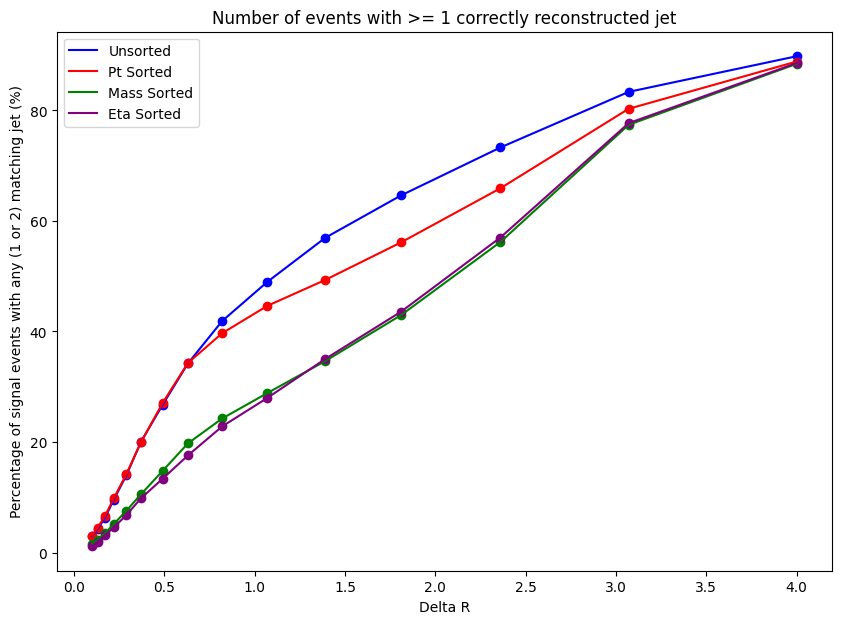

In [9]:
import matplotlib.pyplot as plt

# Replace with your actual data
unsorted = [
    (0.10, 2.95),
    (0.13, 4.24),
    (0.17, 6.21),
    (0.22, 9.57),
    (0.29, 14.02),
    (0.37, 20.02),
    (0.49, 26.73),
    (0.63, 34.21),
    (0.82, 41.90),
    (1.07, 48.98),
    (1.39, 56.94),
    (1.81, 64.62),
    (2.36, 73.29),
    (3.07, 83.35),
    (4.00, 89.80),
]


pt_sorted = [
    (0.10, 3.08),
    (0.13, 4.48),
    (0.17, 6.56),
    (0.22, 9.82),
    (0.29, 14.23),
    (0.37, 19.94),
    (0.49, 27.05),
    (0.63, 34.29),
    (0.82, 39.69),
    (1.07, 44.64),
    (1.39, 49.32),
    (1.81, 56.12),
    (2.36, 65.91),
    (3.07, 80.29),
    (4.00, 88.84),
]

mass_sorted = [
    (0.10, 1.61),
    (0.13, 2.33),
    (0.17, 3.47),
    (0.22, 5.17),
    (0.29, 7.58),
    (0.37, 10.53),
    (0.49, 14.77),
    (0.63, 19.75),
    (0.82, 24.26),
    (1.07, 28.86),
    (1.39, 34.64),
    (1.81, 42.96),
    (2.36, 56.19),
    (3.07, 77.39),
    (4.00, 88.42),
]

eta_sorted = [
    (0.10, 1.15),
    (0.13, 1.95),
    (0.17, 3.10),
    (0.22, 4.55),
    (0.29, 6.80),
    (0.37, 9.82),
    (0.49, 13.35),
    (0.63, 17.57),
    (0.82, 22.83),
    (1.07, 27.98),
    (1.39, 35.02),
    (1.81, 43.58),
    (2.36, 57.00),
    (3.07, 77.69),
    (4.00, 88.57),
]

datasets = [unsorted, pt_sorted, mass_sorted, eta_sorted]
colors = ["blue", "red", "green", "purple"]
titles = ["Unsorted", "Pt Sorted", "Mass Sorted", "Eta Sorted"]

plt.figure(figsize=(10, 7))

for dataset, color, title in zip(datasets, colors, titles):
    deltaR_values, percentages = zip(*dataset)
    plt.plot(deltaR_values, percentages, color=color, label=title)
    plt.scatter(deltaR_values, percentages, color=color)
plt.title("Number of events with >= 1 correctly reconstructed jet")
plt.xlabel("Delta R")
plt.ylabel("Percentage of signal events with any (1 or 2) matching jet (%)")
plt.legend()
plt.show()

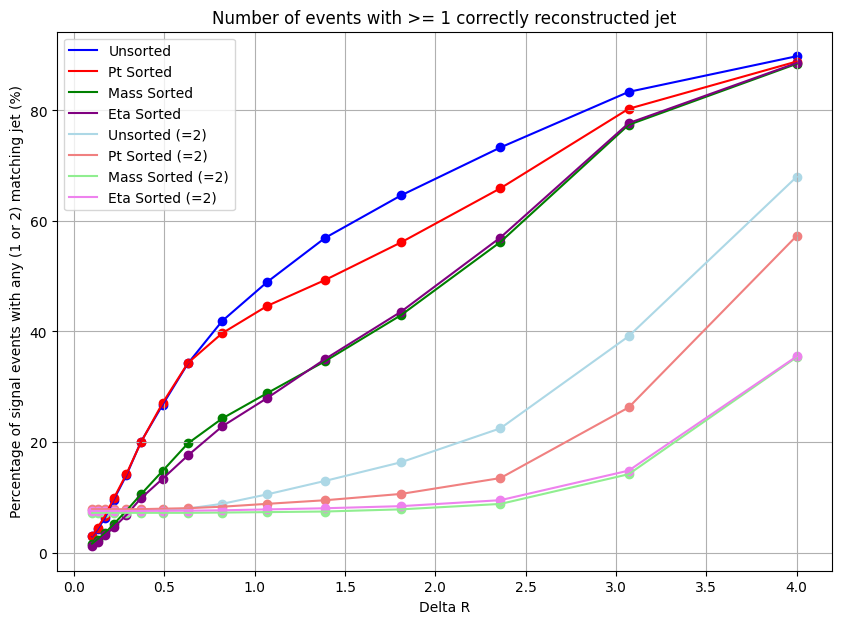

In [11]:
unsorted_new = [
    (0.10, 7.64),
    (0.13, 7.64),
    (0.17, 7.65),
    (0.22, 7.65),
    (0.29, 7.65),
    (0.37, 7.66),
    (0.49, 7.70),
    (0.63, 7.97),
    (0.82, 8.82),
    (1.07, 10.54),
    (1.39, 12.97),
    (1.81, 16.34),
    (2.36, 22.48),
    (3.07, 39.14),
    (4.00, 67.98),
]

pt_sorted_new = [
    (0.10, 7.85),
    (0.13, 7.85),
    (0.17, 7.85),
    (0.22, 7.85),
    (0.29, 7.85),
    (0.37, 7.86),
    (0.49, 7.94),
    (0.63, 8.03),
    (0.82, 8.30),
    (1.07, 8.82),
    (1.39, 9.47),
    (1.81, 10.61),
    (2.36, 13.48),
    (3.07, 26.26),
    (4.00, 57.30),
]

mass_sorted_new = [
    (0.10, 7.19),
    (0.13, 7.19),
    (0.17, 7.19),
    (0.22, 7.19),
    (0.29, 7.19),
    (0.37, 7.19),
    (0.49, 7.19),
    (0.63, 7.19),
    (0.82, 7.24),
    (1.07, 7.32),
    (1.39, 7.43),
    (1.81, 7.82),
    (2.36, 8.80),
    (3.07, 14.18),
    (4.00, 35.35),
]

eta_sorted_new = [
    (0.10, 7.54),
    (0.13, 7.54),
    (0.17, 7.54),
    (0.22, 7.54),
    (0.29, 7.54),
    (0.37, 7.54),
    (0.49, 7.56),
    (0.63, 7.58),
    (0.82, 7.65),
    (1.07, 7.81),
    (1.39, 8.02),
    (1.81, 8.40),
    (2.36, 9.48),
    (3.07, 14.83),
    (4.00, 35.49),
]


datasets = [
    unsorted,
    pt_sorted,
    mass_sorted,
    eta_sorted,
    unsorted_new,
    pt_sorted_new,
    mass_sorted_new,
    eta_sorted_new,
]

colors = ["blue", "red", "green", "purple", "lightblue", "lightcoral", "lightgreen", "violet"]

titles = [
    "Unsorted",
    "Pt Sorted",
    "Mass Sorted",
    "Eta Sorted",
    "Unsorted (=2)",
    "Pt Sorted (=2)",
    "Mass Sorted (=2)",
    "Eta Sorted (=2)",
]

plt.figure(figsize=(10, 7))

for dataset, color, title in zip(datasets, colors, titles):
    deltaR_values, percentages = zip(*dataset)
    plt.plot(deltaR_values, percentages, color=color, label=title)
    plt.scatter(deltaR_values, percentages, color=color)

plt.title("Number of events with >= 1 correctly reconstructed jet")
plt.xlabel("Delta R")
plt.ylabel("Percentage of signal events with any (1 or 2) matching jet (%)")
# plt.xscale('log')
# plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
output = {
    "unfiltered": {
        "0_true_values_percentage": 38.55,
        "1_true_values_percentage": 34.95,
        "2_true_values_percentage": 20.76,
        "0_true_values_stats": {
            "reco_average_mass": None,
            "reco_std_mass": None,
            "reco_average_pt": None,
            "reco_std_pt": None,
            "reco_average_phi": None,
            "reco_std_phi": None,
            "reco_average_eta": None,
            "reco_std_eta": None,
            "gen_average_mass": None,
            "gen_std_mass": None,
            "gen_average_pt": None,
            "gen_std_pt": None,
            "gen_average_phi": None,
            "gen_std_phi": None,
            "gen_average_eta": None,
            "gen_std_eta": None,
            "number_in_category": 3701,
        },
        "1_true_values_stats": {
            "reco_average_mass": 9.8,
            "reco_std_mass": 6.1,
            "reco_average_pt": 60.5,
            "reco_std_pt": 41.3,
            "reco_average_phi": 0.0,
            "reco_std_phi": 1.8,
            "reco_average_eta": -0.0,
            "reco_std_eta": 1.7,
            "gen_average_mass": 47.6,
            "gen_std_mass": 25.6,
            "gen_average_pt": 61.6,
            "gen_std_pt": 38.6,
            "gen_average_phi": 0.1,
            "gen_std_phi": 1.8,
            "gen_average_eta": -0.0,
            "gen_std_eta": 1.7,
            "number_in_category": 3355,
        },
        "2_true_values_stats": {
            "reco_average_mass": 15.2,
            "reco_std_mass": 14.5,
            "reco_average_pt": 95.6,
            "reco_std_pt": 90.0,
            "reco_average_phi": -0.1,
            "reco_std_phi": 1.8,
            "reco_average_eta": 0.0,
            "reco_std_eta": 1.5,
            "gen_average_mass": 52.7,
            "gen_std_mass": 25.3,
            "gen_average_pt": 85.2,
            "gen_std_pt": 57.3,
            "gen_average_phi": -0.0,
            "gen_std_phi": 1.8,
            "gen_average_eta": 0.0,
            "gen_std_eta": 1.5,
            "number_in_category": 1993,
        },
    },
    "fatjet_lepton_ak4_veto": {
        "0_true_values_percentage": 60.54,
        "1_true_values_percentage": 28.77,
        "2_true_values_percentage": 9.78,
        "0_true_values_stats": {
            "reco_average_mass": None,
            "reco_std_mass": None,
            "reco_average_pt": None,
            "reco_std_pt": None,
            "reco_average_phi": None,
            "reco_std_phi": None,
            "reco_average_eta": None,
            "reco_std_eta": None,
            "gen_average_mass": None,
            "gen_std_mass": None,
            "gen_average_pt": None,
            "gen_std_pt": None,
            "gen_average_phi": None,
            "gen_std_phi": None,
            "gen_average_eta": None,
            "gen_std_eta": None,
            "number_in_category": 5812,
        },
        "1_true_values_stats": {
            "reco_average_mass": 10.6,
            "reco_std_mass": 5.0,
            "reco_average_pt": 66.1,
            "reco_std_pt": 31.3,
            "reco_average_phi": -0.0,
            "reco_std_phi": 1.8,
            "reco_average_eta": -0.0,
            "reco_std_eta": 1.6,
            "gen_average_mass": 50.4,
            "gen_std_mass": 25.4,
            "gen_average_pt": 65.3,
            "gen_std_pt": 33.7,
            "gen_average_phi": -0.0,
            "gen_std_phi": 1.8,
            "gen_average_eta": -0.0,
            "gen_std_eta": 1.6,
            "number_in_category": 2762,
        },
        "2_true_values_stats": {
            "reco_average_mass": 11.5,
            "reco_std_mass": 6.0,
            "reco_average_pt": 71.1,
            "reco_std_pt": 34.0,
            "reco_average_phi": -0.0,
            "reco_std_phi": 1.8,
            "reco_average_eta": 0.0,
            "reco_std_eta": 1.6,
            "gen_average_mass": 53.1,
            "gen_std_mass": 24.4,
            "gen_average_pt": 69.6,
            "gen_std_pt": 32.5,
            "gen_average_phi": -0.0,
            "gen_std_phi": 1.8,
            "gen_average_eta": 0.0,
            "gen_std_eta": 1.6,
            "number_in_category": 939,
        },
    },
    "random_sorted": {
        "0_true_values_percentage": 86.12,
        "1_true_values_percentage": 12.14,
        "2_true_values_percentage": 1.68,
        "0_true_values_stats": {
            "reco_average_mass": None,
            "reco_std_mass": None,
            "reco_average_pt": None,
            "reco_std_pt": None,
            "reco_average_phi": None,
            "reco_std_phi": None,
            "reco_average_eta": None,
            "reco_std_eta": None,
            "gen_average_mass": None,
            "gen_std_mass": None,
            "gen_average_pt": None,
            "gen_std_pt": None,
            "gen_average_phi": None,
            "gen_std_phi": None,
            "gen_average_eta": None,
            "gen_std_eta": None,
            "number_in_category": 8268,
        },
        "1_true_values_stats": {
            "reco_average_mass": 10.8,
            "reco_std_mass": 5.2,
            "reco_average_pt": 67.4,
            "reco_std_pt": 32.5,
            "reco_average_phi": 0.0,
            "reco_std_phi": 1.8,
            "reco_average_eta": -0.0,
            "reco_std_eta": 1.5,
            "gen_average_mass": 51.2,
            "gen_std_mass": 25.9,
            "gen_average_pt": 66.5,
            "gen_std_pt": 35.7,
            "gen_average_phi": 0.1,
            "gen_std_phi": 1.8,
            "gen_average_eta": -0.0,
            "gen_std_eta": 1.6,
            "number_in_category": 1165,
        },
        "2_true_values_stats": {
            "reco_average_mass": 15.0,
            "reco_std_mass": 7.1,
            "reco_average_pt": 89.3,
            "reco_std_pt": 36.3,
            "reco_average_phi": -0.0,
            "reco_std_phi": 1.8,
            "reco_average_eta": -0.1,
            "reco_std_eta": 1.5,
            "gen_average_mass": 56.8,
            "gen_std_mass": 22.6,
            "gen_average_pt": 73.2,
            "gen_std_pt": 33.4,
            "gen_average_phi": -0.1,
            "gen_std_phi": 1.7,
            "gen_average_eta": -0.1,
            "gen_std_eta": 1.5,
            "number_in_category": 161,
        },
    },
    "pt_sorted": {
        "0_true_values_percentage": 78.12,
        "1_true_values_percentage": 18.96,
        "2_true_values_percentage": 2.89,
        "0_true_values_stats": {
            "reco_average_mass": None,
            "reco_std_mass": None,
            "reco_average_pt": None,
            "reco_std_pt": None,
            "reco_average_phi": None,
            "reco_std_phi": None,
            "reco_average_eta": None,
            "reco_std_eta": None,
            "gen_average_mass": None,
            "gen_std_mass": None,
            "gen_average_pt": None,
            "gen_std_pt": None,
            "gen_average_phi": None,
            "gen_std_phi": None,
            "gen_average_eta": None,
            "gen_std_eta": None,
            "number_in_category": 7500,
        },
        "1_true_values_stats": {
            "reco_average_mass": 13.2,
            "reco_std_mass": 4.9,
            "reco_average_pt": 86.8,
            "reco_std_pt": 28.4,
            "reco_average_phi": 0.0,
            "reco_std_phi": 1.9,
            "reco_average_eta": 0.0,
            "reco_std_eta": 1.5,
            "gen_average_mass": 60.4,
            "gen_std_mass": 24.4,
            "gen_average_pt": 81.3,
            "gen_std_pt": 36.3,
            "gen_average_phi": 0.0,
            "gen_std_phi": 1.9,
            "gen_average_eta": 0.0,
            "gen_std_eta": 1.6,
            "number_in_category": 1820,
        },
        "2_true_values_stats": {
            "reco_average_mass": 16.9,
            "reco_std_mass": 7.2,
            "reco_average_pt": 101.3,
            "reco_std_pt": 37.5,
            "reco_average_phi": -0.0,
            "reco_std_phi": 1.8,
            "reco_average_eta": -0.0,
            "reco_std_eta": 1.5,
            "gen_average_mass": 57.2,
            "gen_std_mass": 22.4,
            "gen_average_pt": 76.5,
            "gen_std_pt": 35.1,
            "gen_average_phi": 0.0,
            "gen_std_phi": 1.8,
            "gen_average_eta": -0.0,
            "gen_std_eta": 1.6,
            "number_in_category": 277,
        },
    },
    "mass_sorted": {
        "0_true_values_percentage": 85.30,
        "1_true_values_percentage": 10.16,
        "2_true_values_percentage": 1.46,
        "0_true_values_stats": {
            "reco_average_mass": None,
            "reco_std_mass": None,
            "reco_average_pt": None,
            "reco_std_pt": None,
            "reco_average_phi": None,
            "reco_std_phi": None,
            "reco_average_eta": None,
            "reco_std_eta": None,
            "gen_average_mass": None,
            "gen_std_mass": None,
            "gen_average_pt": None,
            "gen_std_pt": None,
            "gen_average_phi": None,
            "gen_std_phi": None,
            "gen_average_eta": None,
            "gen_std_eta": None,
            "number_in_category": 8189,
        },
        "1_true_values_stats": {
            "reco_average_mass": 12.1,
            "reco_std_mass": 5.2,
            "reco_average_pt": 77.0,
            "reco_std_pt": 32.4,
            "reco_average_phi": -0.0,
            "reco_std_phi": 1.8,
            "reco_average_eta": 0.0,
            "reco_std_eta": 1.8,
            "gen_average_mass": 57.5,
            "gen_std_mass": 25.2,
            "gen_average_pt": 71.8,
            "gen_std_pt": 36.3,
            "gen_average_phi": 0.0,
            "gen_std_phi": 1.8,
            "gen_average_eta": 0.0,
            "gen_std_eta": 1.8,
            "number_in_category": 975,
        },
        "2_true_values_stats": {
            "reco_average_mass": 17.3,
            "reco_std_mass": 7.8,
            "reco_average_pt": 103.7,
            "reco_std_pt": 45.0,
            "reco_average_phi": 0.1,
            "reco_std_phi": 1.8,
            "reco_average_eta": -0.1,
            "reco_std_eta": 1.8,
            "gen_average_mass": 57.7,
            "gen_std_mass": 21.9,
            "gen_average_pt": 78.0,
            "gen_std_pt": 38.4,
            "gen_average_phi": 0.1,
            "gen_std_phi": 1.8,
            "gen_average_eta": -0.1,
            "gen_std_eta": 1.8,
            "number_in_category": 140,
        },
    },
    "eta_sorted": {
        "0_true_values_percentage": 86.54,
        "1_true_values_percentage": 9.23,
        "2_true_values_percentage": 1.15,
        "0_true_values_stats": {
            "reco_average_mass": None,
            "reco_std_mass": None,
            "reco_average_pt": None,
            "reco_std_pt": None,
            "reco_average_phi": None,
            "reco_std_phi": None,
            "reco_average_eta": None,
            "reco_std_eta": None,
            "gen_average_mass": None,
            "gen_std_mass": None,
            "gen_average_pt": None,
            "gen_std_pt": None,
            "gen_average_phi": None,
            "gen_std_phi": None,
            "gen_average_eta": None,
            "gen_std_eta": None,
            "number_in_category": 8308,
        },
        "1_true_values_stats": {
            "reco_average_mass": 10.5,
            "reco_std_mass": 4.9,
            "reco_average_pt": 65.3,
            "reco_std_pt": 31.4,
            "reco_average_phi": -0.0,
            "reco_std_phi": 1.8,
            "reco_average_eta": -0.0,
            "reco_std_eta": 1.9,
            "gen_average_mass": 54.6,
            "gen_std_mass": 25.7,
            "gen_average_pt": 64.0,
            "gen_std_pt": 32.8,
            "gen_average_phi": 0.0,
            "gen_std_phi": 1.8,
            "gen_average_eta": 0.0,
            "gen_std_eta": 1.9,
            "number_in_category": 886,
        },
        "2_true_values_stats": {
            "reco_average_mass": 15.7,
            "reco_std_mass": 7.1,
            "reco_average_pt": 92.6,
            "reco_std_pt": 37.7,
            "reco_average_phi": -0.1,
            "reco_std_phi": 1.8,
            "reco_average_eta": -0.3,
            "reco_std_eta": 1.8,
            "gen_average_mass": 57.4,
            "gen_std_mass": 21.9,
            "gen_average_pt": 72.6,
            "gen_std_pt": 32.8,
            "gen_average_phi": 0.0,
            "gen_std_phi": 1.8,
            "gen_average_eta": -0.3,
            "gen_std_eta": 1.9,
            "number_in_category": 110,
        },
    },
}

In [25]:
# Prepare lists to populate DataFrame
sort_types = []
matches = []
rows = []
means = []
std_devs = []
percentages = []

for sort_key, sort_value in output.items():
    for match in ["0", "1", "2"]:
        percentage_key = f"{match}_true_values_percentage"
        stats_key = f"{match}_true_values_stats"

        if percentage_key in sort_value:
            percentage = sort_value[percentage_key]
        else:
            percentage = None

        if stats_key in sort_value:
            for row in ["mass", "pt", "eta"]:
                reco_mean_key = f"reco_average_{row}"
                reco_std_key = f"reco_std_{row}"
                gen_mean_key = f"gen_average_{row}"
                gen_std_key = f"gen_std_{row}"

                sort_types.extend([sort_key, sort_key])
                matches.extend([match, match])
                rows.extend([f"reco_{row}", f"gen_{row}"])
                means.extend(
                    [
                        sort_value[stats_key].get(reco_mean_key, None),
                        sort_value[stats_key].get(gen_mean_key, None),
                    ]
                )
                std_devs.extend(
                    [
                        sort_value[stats_key].get(reco_std_key, None),
                        sort_value[stats_key].get(gen_std_key, None),
                    ]
                )
                percentages.extend([percentage] * 2)

# Create DataFrame
df = pd.DataFrame(
    {
        "Sort_Type": sort_types,
        "Match": matches,
        "Row": rows,
        "Mean": means,
        "Standard_Deviation": std_devs,
        "Percentage": percentages,
    }
)

# Pivot DataFrame to create multi-index columns
df = df.pivot(index=["Sort_Type", "Row"], columns="Match")

# Swap column levels
df = df.swaplevel(0, 1, axis=1).sort_index(axis=1)

df

Match                               0                                   1  \
                                 Mean Percentage Standard_Deviation  Mean   
Sort_Type              Row                                                  
eta_sorted             gen_eta    NaN      86.54                NaN   0.0   
                       gen_mass   NaN      86.54                NaN  54.6   
                       gen_pt     NaN      86.54                NaN  64.0   
                       reco_eta   NaN      86.54                NaN  -0.0   
                       reco_mass  NaN      86.54                NaN  10.5   
                       reco_pt    NaN      86.54                NaN  65.3   
fatjet_lepton_ak4_veto gen_eta    NaN      60.54                NaN  -0.0   
                       gen_mass   NaN      60.54                NaN  50.4   
                       gen_pt     NaN      60.54                NaN  65.3   
                       reco_eta   NaN      60.54                NaN  -0.0   
                       reco_mass  NaN      60.54                NaN  10.6   
                       reco_pt    NaN      60.54                NaN  66.1   
mass_sorted            gen_eta    NaN      85.30                NaN   0.0   
                       gen_mass   NaN      85.30                NaN  57.5   
                       gen_pt     NaN      85.30                NaN  71.8   
                       reco_eta   NaN      85.30                NaN   0.0   
                       reco_mass  NaN      85.30                NaN  12.1   
                       reco_pt    NaN      85.30                NaN  77.0   
pt_sorted              gen_eta    NaN      78.12                NaN   0.0   
                       gen_mass   NaN      78.12                NaN  60.4   
                       gen_pt     NaN      78.12                NaN  81.3   
                       reco_eta   NaN      78.12                NaN   0.0   
                       reco_mass  NaN      78.12                NaN  13.2   
                       reco_pt    NaN      78.12                NaN  86.8   
random_sorted          gen_eta    NaN      86.12                NaN  -0.0   
                       gen_mass   NaN      86.12                NaN  51.2   
                       gen_pt     NaN      86.12                NaN  66.5   
                       reco_eta   NaN      86.12                NaN  -0.0   
                       reco_mass  NaN      86.12                NaN  10.8   
                       reco_pt    NaN      86.12                NaN  67.4   
unfiltered             gen_eta    NaN      38.55                NaN  -0.0   
                       gen_mass   NaN      38.55                NaN  47.6   
                       gen_pt     NaN      38.55                NaN  61.6   
                       reco_eta   NaN      38.55                NaN  -0.0   
                       reco_mass  NaN      38.55                NaN   9.8   
                       reco_pt    NaN      38.55                NaN  60.5   

Match                                                               2  \
                                 Percentage Standard_Deviation   Mean   
Sort_Type              Row                                              
eta_sorted             gen_eta         9.23                1.9   -0.3   
                       gen_mass        9.23               25.7   57.4   
                       gen_pt          9.23               32.8   72.6   
                       reco_eta        9.23                1.9   -0.3   
                       reco_mass       9.23                4.9   15.7   
                       reco_pt         9.23               31.4   92.6   
fatjet_lepton_ak4_veto gen_eta        28.77                1.6    0.0   
                       gen_mass       28.77               25.4   53.1   
                       gen_pt         28.77               33.7   69.6   
                       reco_eta       28.77                1.6    0.0   
                       reco_mass      28.77    

In [24]:
import pandas as pd


# Prepare lists to populate DataFrame
sort_types = []
matches = []
rows = []
means = []
std_devs = []
percentages = []

for sort_key, sort_value in output.items():
    for match in ["0", "1", "2"]:
        percentage_key = f"{match}_true_values_percentage"
        stats_key = f"{match}_true_values_stats"

        if percentage_key in sort_value:
            percentage = sort_value[percentage_key]
        else:
            percentage = None

        if stats_key in sort_value:
            for row in ["mass", "pt", "eta"]:
                reco_mean_key = f"reco_average_{row}"
                reco_std_key = f"reco_std_{row}"
                gen_mean_key = f"gen_average_{row}"
                gen_std_key = f"gen_std_{row}"

                sort_types.extend([sort_key, sort_key])
                matches.extend([match, match])
                rows.extend([f"reco_{row}", f"gen_{row}"])
                means.extend(
                    [
                        sort_value[stats_key].get(reco_mean_key, None),
                        sort_value[stats_key].get(gen_mean_key, None),
                    ]
                )
                std_devs.extend(
                    [
                        sort_value[stats_key].get(reco_std_key, None),
                        sort_value[stats_key].get(gen_std_key, None),
                    ]
                )
                percentages.extend([percentage] * 2)

# Create DataFrame
df = pd.DataFrame(
    {
        "Sort_Type": sort_types,
        "Match": matches,
        "Row": rows,
        "Mean": means,
        "Standard_Deviation": std_devs,
        "Percentage": percentages,
    }
)

# Pivot DataFrame to create multi-index columns
df = df.pivot_table(index="Sort_Type", columns=["Match", "Row"])

# Swap column levels
df = df.swaplevel(0, 2, axis=1).sort_index(axis=1)

print(df)
df

Row                       gen_eta                                          \
Match                           0    1                                  2   
                       Percentage Mean Percentage Standard_Deviation Mean   
Sort_Type                                                                   
eta_sorted                  86.54  0.0       9.23                1.9 -0.3   
fatjet_lepton_ak4_veto      60.54  0.0      28.77                1.6  0.0   
mass_sorted                 85.30  0.0      10.16                1.8 -0.1   
pt_sorted                   78.12  0.0      18.96                1.6  0.0   
random_sorted               86.12  0.0      12.14                1.6 -0.1   
unfiltered                  38.55  0.0      34.95                1.7  0.0   

Row                                                    gen_mass        \
Match                                                         0     1   
                       Percentage Standard_Deviation Percentage  Mean   
Sort_Type 

Row                       gen_eta                                          \
Match                           0    1                                  2   
                       Percentage Mean Percentage Standard_Deviation Mean   
Sort_Type                                                                   
eta_sorted                  86.54  0.0       9.23                1.9 -0.3   
fatjet_lepton_ak4_veto      60.54  0.0      28.77                1.6  0.0   
mass_sorted                 85.30  0.0      10.16                1.8 -0.1   
pt_sorted                   78.12  0.0      18.96                1.6  0.0   
random_sorted               86.12  0.0      12.14                1.6 -0.1   
unfiltered                  38.55  0.0      34.95                1.7  0.0   

Row                                                    gen_mass        \
Match                                                         0     1   
                       Percentage Standard_Deviation Percentage  Mean   
Sort_Type                                                               
eta_sorted                   1.15                1.9      86.54  54.6   
fatjet_lepton_ak4_veto       9.78                1.6      60.54  50.4   
mass_sorted                  1.46                1.8      85.30  57.5   
pt_sorted                    2.89                1.6      78.12  60.4   
random_sorted                1.68                1.5      86.12  51.2   
unfiltered                  20.76                1.5      38.55  47.6   

Row                                ... reco_mass             \
Match                              ...         2              
                       Percentage  ...      Mean Percentage   
Sort_Type                          ...                        
eta_sorted                   9.23  ...      15.7       1.15   
fatjet_lepton_ak4_veto      28.77  ...      11.5       9.78   
mass_sorted                 10.16  ...      17.3       1.46   
pt_sorted                   18.96  ...      16.9       2.89   
random_sorted               12.14  ...      15.0       1.68   
unfiltered                  34.95  ...      15.2      20.76   

Row                                          reco_pt                   \
Match                                              0     1              
                       Standard_Deviation Percentage  Mean Percentage   
Sort_Type                                                               
eta_sorted                            7.1      86.54  65.3       9.23   
fatjet_lepton_ak4_veto                6.0      60.54  66.1      28.77   
mass_sorted                           7.8      85.30  77.0      10.16   
pt_sorted                             7.2      78.12  86.8      18.96   
random_sorted                         7.1      86.12  67.4      12.14   
unfiltered                           14.5      38.55  60.5      34.95   

Row                                                                             
Match                                          2                                
                       Standard_Deviation   Mean Percentage Standard_Deviation  
Sort_Type                                                                       
eta_sorted                           31.4   92.6       1.15               37.7  
fatjet_lepton_ak4_veto               31.3   71.1       9.78               34.0  
mass_sorted                          32.4  103.7       1.46               45.0  
pt_sorted                            28.4  101.3       2.89               37.5  
random_sorted                        32.5   89.3       1.68               36.3  
unfiltered                           41.3   95.6      20.76               90.0  

[6 rows x 42 columns]

In [36]:
# Prepare lists to populate DataFrame
sort_types = []
matches = []
rows = []
means = []
std_devs = []
percentages = []

for sort_key, sort_value in output.items():
    for match in ["0", "1", "2"]:
        percentage_key = f"{match}_true_values_percentage"
        stats_key = f"{match}_true_values_stats"

        if percentage_key in sort_value:
            percentage = sort_value[percentage_key]
        else:
            percentage = None

        if stats_key in sort_value:
            for row in ["mass", "pt", "eta"]:
                reco_mean_key = f"reco_average_{row}"
                reco_std_key = f"reco_std_{row}"
                gen_mean_key = f"gen_average_{row}"
                gen_std_key = f"gen_std_{row}"

                sort_types.extend([sort_key, sort_key])
                matches.extend([match, match])
                rows.extend([f"reco_{row}", f"gen_{row}"])
                means.extend(
                    [
                        sort_value[stats_key].get(reco_mean_key, None),
                        sort_value[stats_key].get(gen_mean_key, None),
                    ]
                )
                std_devs.extend(
                    [
                        sort_value[stats_key].get(reco_std_key, None),
                        sort_value[stats_key].get(gen_std_key, None),
                    ]
                )
                percentages.extend([percentage] * 2)

# Create DataFrame
df = pd.DataFrame(
    {
        "Sort_Type": sort_types,
        "Match": matches,
        "Row": rows,
        "Mean": means,
        "Standard_Deviation": std_devs,
        "Percentage": percentages,
    }
)

# Pivot DataFrame to create multi-index columns
df = df.pivot(index="Sort_Type", columns=["Row", "Match"])

# Swap column levels
df = df.swaplevel(0, 1, axis=1).swaplevel(1, 0, axis=1).sort_index(axis=1)

df

Mean                                              \
Row                    gen_eta           gen_mass             gen_pt         
Match                        0    1    2        0     1     2      0     1   
Sort_Type                                                                    
eta_sorted                 NaN  0.0 -0.3      NaN  54.6  57.4    NaN  64.0   
fatjet_lepton_ak4_veto     NaN -0.0  0.0      NaN  50.4  53.1    NaN  65.3   
mass_sorted                NaN  0.0 -0.1      NaN  57.5  57.7    NaN  71.8   
pt_sorted                  NaN  0.0 -0.0      NaN  60.4  57.2    NaN  81.3   
random_sorted              NaN -0.0 -0.1      NaN  51.2  56.8    NaN  66.5   
unfiltered                 NaN -0.0  0.0      NaN  47.6  52.7    NaN  61.6   

                                       ... Standard_Deviation                \
Row                          reco_eta  ...             gen_pt reco_eta        
Match                      2        0  ...                  2        0    1   
Sort_Type                              ...                                    
eta_sorted              72.6      NaN  ...               32.8      NaN  1.9   
fatjet_lepton_ak4_veto  69.6      NaN  ...               32.5      NaN  1.6   
mass_sorted             78.0      NaN  ...               38.4      NaN  1.8   
pt_sorted               76.5      NaN  ...               35.1      NaN  1.5   
random_sorted           73.2      NaN  ...               33.4      NaN  1.5   
unfiltered              85.2      NaN  ...               57.3      NaN  1.7   

                                                                      
Row                         reco_mass            reco_pt              
Match                     2         0    1     2       0     1     2  
Sort_Type                                                             
eta_sorted              1.8       NaN  4.9   7.1     NaN  31.4  37.7  
fatjet_lepton_ak4_veto  1.6       NaN  5.0   6.0     NaN  31.3  34.0  
mass_sorted             1.8       NaN  5.2   7.8     NaN  32.4  45.0  
pt_sorted               1.5       NaN  4.9   7.2     NaN  28.4  37.5  
random_sorted           1.5       NaN  5.2   7.1     NaN  32.5  36.3  
unfiltered              1.5       NaN  6.1  14.5     NaN  41.3  90.0  

[6 rows x 54 columns]

In [40]:
df

Mean                                              \
Row                    gen_eta           gen_mass             gen_pt         
Match                        0    1    2        0     1     2      0     1   
Sort_Type                                                                    
eta_sorted                 NaN  0.0 -0.3      NaN  54.6  57.4    NaN  64.0   
fatjet_lepton_ak4_veto     NaN -0.0  0.0      NaN  50.4  53.1    NaN  65.3   
mass_sorted                NaN  0.0 -0.1      NaN  57.5  57.7    NaN  71.8   
pt_sorted                  NaN  0.0 -0.0      NaN  60.4  57.2    NaN  81.3   
random_sorted              NaN -0.0 -0.1      NaN  51.2  56.8    NaN  66.5   
unfiltered                 NaN -0.0  0.0      NaN  47.6  52.7    NaN  61.6   

                                       ... Standard_Deviation                \
Row                          reco_eta  ...             gen_pt reco_eta        
Match                      2        0  ...                  2        0    1   
Sort_Type                              ...                                    
eta_sorted              72.6      NaN  ...               32.8      NaN  1.9   
fatjet_lepton_ak4_veto  69.6      NaN  ...               32.5      NaN  1.6   
mass_sorted             78.0      NaN  ...               38.4      NaN  1.8   
pt_sorted               76.5      NaN  ...               35.1      NaN  1.5   
random_sorted           73.2      NaN  ...               33.4      NaN  1.5   
unfiltered              85.2      NaN  ...               57.3      NaN  1.7   

                                                                      
Row                         reco_mass            reco_pt              
Match                     2         0    1     2       0     1     2  
Sort_Type                                                             
eta_sorted              1.8       NaN  4.9   7.1     NaN  31.4  37.7  
fatjet_lepton_ak4_veto  1.6       NaN  5.0   6.0     NaN  31.3  34.0  
mass_sorted             1.8       NaN  5.2   7.8     NaN  32.4  45.0  
pt_sorted               1.5       NaN  4.9   7.2     NaN  28.4  37.5  
random_sorted           1.5       NaN  5.2   7.1     NaN  32.5  36.3  
unfiltered              1.5       NaN  6.1  14.5     NaN  41.3  90.0  

[6 rows x 54 columns]

In [43]:
# Import the necessary libraries
from IPython.display import display, HTML

# Set the display options
pd.set_option("display.max_columns", None)
pd.set_option("display.expand_frame_repr", False)
pd.set_option("display.max_colwidth", None)

# Display the DataFrame as HTML
display(HTML(df.to_html()))

In [44]:
output_dict = {
    "unfiltered": {
        "true_0": {"percentage": "5.72%", "event_count": 549, "reco_jet": None, "gen_jet": None},
        "true_1": {
            "percentage": "38.82%",
            "event_count": 3727,
            "reco_jet": {
                "mass": {"average": 11.2, "std": 6.8},
                "pt": {"average": 79.1, "std": 64.7},
                "phi": {"average": 0.0, "std": 1.8},
                "eta": {"average": 0.0, "std": 3.0},
            },
            "gen_jet": {
                "mass": {"average": 0.0, "std": 0.0},
                "pt": {"average": 80.3, "std": 65.6},
                "phi": {"average": 0.0, "std": 1.8},
                "eta": {"average": 0.0, "std": 3.0},
            },
        },
        "true_2": {
            "percentage": "53.31%",
            "event_count": 5118,
            "reco_jet": {
                "mass": {"average": 10.8, "std": 6.5},
                "pt": {"average": 75.9, "std": 65.5},
                "phi": {"average": 0.0, "std": 1.8},
                "eta": {"average": 0.0, "std": 2.9},
            },
            "gen_jet": {
                "mass": {"average": 0.0, "std": 0.0},
                "pt": {"average": 77.5, "std": 65.9},
                "phi": {"average": 0.0, "std": 1.8},
                "eta": {"average": 0.0, "std": 2.9},
            },
        },
    },
    "fatjet_lepton_ak4_veto": {
        "true_0": {"percentage": "19.08%", "event_count": 1832, "reco_jet": None, "gen_jet": None},
        "true_1": {
            "percentage": "50.12%",
            "event_count": 4812,
            "reco_jet": {
                "mass": {"average": 11.0, "std": 4.6},
                "pt": {"average": 73.3, "std": 37.1},
                "phi": {"average": 0.0, "std": 1.8},
                "eta": {"average": 0.0, "std": 2.9},
            },
            "gen_jet": {
                "mass": {"average": 0.0, "std": 0.0},
                "pt": {"average": 73.9, "std": 38.1},
                "phi": {"average": 0.0, "std": 1.8},
                "eta": {"average": 0.0, "std": 2.9},
            },
        },
        "true_2": {
            "percentage": "30.36%",
            "event_count": 2915,
            "reco_jet": {
                "mass": {"average": 10.4, "std": 4.1},
                "pt": {"average": 68.9, "std": 33.4},
                "phi": {"average": 0.0, "std": 1.8},
                "eta": {"average": 0.0, "std": 2.9},
            },
            "gen_jet": {
                "mass": {"average": 0.0, "std": 0.0},
                "pt": {"average": 69.3, "std": 34.3},
                "phi": {"average": 0.0, "std": 1.8},
                "eta": {"average": 0.0, "std": 2.9},
            },
        },
    },
    "random_sorted": {
        "true_0": {"percentage": "69.83%", "event_count": 6704, "reco_jet": None, "gen_jet": None},
        "true_1": {
            "percentage": "28.07%",
            "event_count": 2695,
            "reco_jet": {
                "mass": {"average": 10.9, "std": 4.8},
                "pt": {"average": 73.8, "std": 38.9},
                "phi": {"average": 0.0, "std": 1.8},
                "eta": {"average": 0.0, "std": 2.8},
            },
            "gen_jet": {
                "mass": {"average": 0.0, "std": 0.0},
                "pt": {"average": 74.7, "std": 40.7},
                "phi": {"average": 0.0, "std": 1.8},
                "eta": {"average": 0.0, "std": 2.8},
            },
        },
        "true_2": {
            "percentage": "2.09%",
            "event_count": 201,
            "reco_jet": {
                "mass": {"average": 11.3, "std": 4.9},
                "pt": {"average": 78.5, "std": 44.4},
                "phi": {"average": 0.0, "std": 1.8},
                "eta": {"average": 0.1, "std": 2.9},
            },
            "gen_jet": {
                "mass": {"average": 0.0, "std": 0.0},
                "pt": {"average": 79.6, "std": 49.6},
                "phi": {"average": 0.0, "std": 1.8},
                "eta": {"average": 0.1, "std": 2.9},
            },
        },
    },
    "pt_sorted": {
        "true_0": {"percentage": "42.99%", "event_count": 4127, "reco_jet": None, "gen_jet": None},
        "true_1": {
            "percentage": "51.66%",
            "event_count": 4959,
            "reco_jet": {
                "mass": {"average": 12.7, "std": 4.5},
                "pt": {"average": 89.3, "std": 34.4},
                "phi": {"average": 0.0, "std": 1.8},
                "eta": {"average": 0.0, "std": 2.8},
            },
            "gen_jet": {
                "mass": {"average": 0.0, "std": 0.0},
                "pt": {"average": 87.9, "std": 36.4},
                "phi": {"average": 0.0, "std": 1.8},
                "eta": {"average": 0.0, "std": 2.8},
            },
        },
        "true_2": {
            "percentage": "5.35%",
            "event_count": 514,
            "reco_jet": {
                "mass": {"average": 12.7, "std": 4.5},
                "pt": {"average": 89.4, "std": 36.2},
                "phi": {"average": 0.0, "std": 1.8},
                "eta": {"average": 0.0, "std": 2.8},
            },
            "gen_jet": {
                "mass": {"average": 0.0, "std": 0.0},
                "pt": {"average": 87.5, "std": 40.0},
                "phi": {"average": 0.0, "std": 1.8},
                "eta": {"average": 0.0, "std": 2.8},
            },
        },
    },
    "mass_sorted": {
        "true_0": {"percentage": "23.02%", "event_count": 2210, "reco_jet": None, "gen_jet": None},
        "true_1": {
            "percentage": "50.26%",
            "event_count": 4825,
            "reco_jet": {
                "mass": {"average": 11.1, "std": 4.6},
                "pt": {"average": 74.2, "std": 36.5},
                "phi": {"average": 0.0, "std": 1.8},
                "eta": {"average": 0.0, "std": 3.0},
            },
            "gen_jet": {
                "mass": {"average": 0.0, "std": 0.0},
                "pt": {"average": 74.7, "std": 37.4},
                "phi": {"average": 0.0, "std": 1.8},
                "eta": {"average": 0.0, "std": 3.0},
            },
        },
        "true_2": {
            "percentage": "23.65%",
            "event_count": 2270,
            "reco_jet": {
                "mass": {"average": 10.6, "std": 4.2},
                "pt": {"average": 70.4, "std": 33.7},
                "phi": {"average": 0.0, "std": 1.8},
                "eta": {"average": 0.0, "std": 3.0},
            },
            "gen_jet": {
                "mass": {"average": 0.0, "std": 0.0},
                "pt": {"average": 69.9, "std": 34.6},
                "phi": {"average": 0.0, "std": 1.8},
                "eta": {"average": 0.0, "std": 3.0},
            },
        },
    },
    "eta_sorted": {
        "true_0": {"percentage": "24.30%", "event_count": 2333, "reco_jet": None, "gen_jet": None},
        "true_1": {
            "percentage": "49.50%",
            "event_count": 4752,
            "reco_jet": {
                "mass": {"average": 10.8, "std": 4.5},
                "pt": {"average": 71.5, "std": 36.0},
                "phi": {"average": 0.0, "std": 1.8},
                "eta": {"average": -0.1, "std": 3.0},
            },
            "gen_jet": {
                "mass": {"average": 0.0, "std": 0.0},
                "pt": {"average": 72.1, "std": 36.9},
                "phi": {"average": 0.0, "std": 1.8},
                "eta": {"average": -0.1, "std": 3.0},
            },
        },
        "true_2": {
            "percentage": "23.12%",
            "event_count": 2220,
            "reco_jet": {
                "mass": {"average": 10.3, "std": 4.1},
                "pt": {"average": 67.6, "std": 32.7},
                "phi": {"average": 0.0, "std": 1.8},
                "eta": {"average": 0.0, "std": 3.1},
            },
            "gen_jet": {
                "mass": {"average": 0.0, "std": 0.0},
                "pt": {"average": 67.6, "std": 33.3},
                "phi": {"average": 0.0, "std": 1.8},
                "eta": {"average": 0.0, "std": 3.0},
            },
        },
    },
}

In [45]:
df

Mean                                                                                                                 Percentage                                                                                                                                Standard_Deviation                                                                                                              
Row                    gen_eta           gen_mass             gen_pt             reco_eta           reco_mass             reco_pt                 gen_eta               gen_mass               gen_pt               reco_eta               reco_mass               reco_pt                          gen_eta           gen_mass             gen_pt             reco_eta           reco_mass            reco_pt            
Match                        0    1    2        0     1     2      0     1     2        0    1    2         0     1     2       0     1      2          0      1      2        0      1      2      0      1      2        0      1      2         0      1      2       0      1      2                  0    1    2        0     1     2      0     1     2        0    1    2         0    1     2       0     1     2
Sort_Type                                                                                                                                                                                                                                                                                                                                                                                                                
eta_sorted                 NaN  0.0 -0.3      NaN  54.6  57.4    NaN  64.0  72.6      NaN -0.0 -0.3       NaN  10.5  15.7     NaN  65.3   92.6      86.54   9.23   1.15    86.54   9.23   1.15  86.54   9.23   1.15    86.54   9.23   1.15     86.54   9.23   1.15   86.54   9.23   1.15                NaN  1.9  1.9      NaN  25.7  21.9    NaN  32.8  32.8      NaN  1.9  1.8       NaN  4.9   7.1     NaN  31.4  37.7
fatjet_lepton_ak4_veto     NaN -0.0  0.0      NaN  50.4  53.1    NaN  65.3  69.6      NaN -0.0  0.0       NaN  10.6  11.5     NaN  66.1   71.1      60.54  28.77   9.78    60.54  28.77   9.78  60.54  28.77   9.78    60.54  28.77   9.78     60.54  28.77   9.78   60.54  28.77   9.78                NaN  1.6  1.6      NaN  25.4  24.4    NaN  33.7  32.5      NaN  1.6  1.6       NaN  5.0   6.0     NaN  31.3  34.0
mass_sorted                NaN  0.0 -0.1      NaN  57.5  57.7    NaN  71.8  78.0      NaN  0.0 -0.1       NaN  12.1  17.3     NaN  77.0  103.7      85.30  10.16   1.46    85.30  10.16   1.46  85.30  10.16   1.46    85.30  10.16   1.46     85.30  10.16   1.46   85.30  10.16   1.46                NaN  1.8  1.8      NaN  25.2  21.9    NaN  36.3  38.4      NaN  1.8  1.8       NaN  5.2   7.8     NaN  32.4  45.0
pt_sorted                  NaN  0.0 -0.0      NaN  60.4  57.2    NaN  81.3  76.5      NaN  0.0 -0.0       NaN  13.2  16.9     NaN  86.8  101.3      78.12  18.96   2.89    78.12  18.96   2.89  78.12  18.96   2.89    78.12  18.96   2.89     78.12  18.96   2.89   78.12  18.96   2.89                NaN  1.6  1.6      NaN  24.4  22.4    NaN  36.3  35.1      NaN  1.5  1.5       NaN  4.9   7.2     NaN  28.4  37.5
random_sorted              NaN -0.0 -0.1      NaN  51.2  56.8    NaN  66.5  73.2      NaN -0.0 -0.1       NaN  10.8  15.0     NaN  67.4   89.3      86.12  12.14   1.68    86.12  12.14   1.68  86.12  12.14   1.68    86.12  12.14   1.68     86.12  12.14   1.68   86.12  12.14   1.68                NaN  1.6  1.5      NaN  25.9  22.6    NaN  35.7  33.4      NaN  1.5  1.5       NaN  5.2   7.1     NaN  32.5  36.3
unfiltered                 NaN -0.0  0.0      NaN  47.6  52.7    NaN  61.6  85.2      NaN -0.0  0.0       NaN   9.8  15.2     NaN  60.5   95.6      38.55  34.95  20.76    38.55  34.95  20.76  38.55  34.95  20.76    38.55  34.95  20.76     38.55  34.95  20.76   38.55  34.95  20.76                NaN  1.7  1.5      NaN  25.6  25.3    Na

In [46]:
import pandas as pd


data_rows = []
for sorttype, sortdata in output_dict.items():
    for true_val, truedata in sortdata.items():
        row = {
            "sorttype": sorttype,
            "true_val": true_val,
            "percentage": truedata["percentage"],
            "event_count": truedata["event_count"],
        }
        for jettype in ["reco_jet", "gen_jet"]:
            if truedata[jettype] is not None:
                for var, vardata in truedata[jettype].items():
                    for stat, value in vardata.items():
                        row[f"{jettype}_{var}_{stat}"] = value
            else:
                row[f"{jettype}_mass_average"] = None
                row[f"{jettype}_mass_std"] = None
                row[f"{jettype}_pt_average"] = None
                row[f"{jettype}_pt_std"] = None
                row[f"{jettype}_phi_average"] = None
                row[f"{jettype}_phi_std"] = None
                row[f"{jettype}_eta_average"] = None
                row[f"{jettype}_eta_std"] = None
        data_rows.append(row)

df = pd.DataFrame(data_rows)
df

,sorttype,true_val,percentage,event_count,reco_jet_mass_average,reco_jet_mass_std,reco_jet_pt_average,reco_jet_pt_std,reco_jet_phi_average,reco_jet_phi_std,reco_jet_eta_average,reco_jet_eta_std,gen_jet_mass_average,gen_jet_mass_std,gen_jet_pt_average,gen_jet_pt_std,gen_jet_phi_average,gen_jet_phi_std,gen_jet_eta_average,gen_jet_eta_std
0,unfiltered,true_0,5.72%,549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,unfiltered,true_1,38.82%,3727,11.2,6.8,79.1,64.7,0.0,1.8,0.0,3.0,0.0,0.0,80.3,65.6,0.0,1.8,0.0,3.0
2,unfiltered,true_2,53.31%,5118,10.8,6.5,75.9,65.5,0.0,1.8,0.0,2.9,0.0,0.0,77.5,65.9,0.0,1.8,0.0,2.9
3,fatjet_lepton_ak4_veto,true_0,19.08%,1832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,fatjet_lepton_ak4_veto,true_1,50.12%,4812,11.0,4.6,73.3,37.1,0.0,1.8,0.0,2.9,0.0,0.0,73.9,38.1,0.0,1.8,0.0,2.9
5,fatjet_lepton_ak4_veto,true_2,30.36%,2915,10.4,4.1,68.9,33.4,0.0,1.8,0.0,2.9,0.0,0.0,69.3,34.3,0.0,1.8,0.0,2.9
6,random_sorted,true_0,69.83%,6704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,random_sorted,true_1,28.07%,2695,10.9,4.8,73.8,38.9,0.0,1.8,0.0,2.8,0.0,0.0,74.7,40.7,0.0,1.8,0.0,2.8
8,random_sorted,true_2,2.09%,201,11.3,4.9,78.5,44.4,0.0,1.8,0.1,2.9,0.0,0.0,79.6,49.6,0.0,1.8,0.1,2.9
9,pt_sorted,true_0,42.99%,4127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


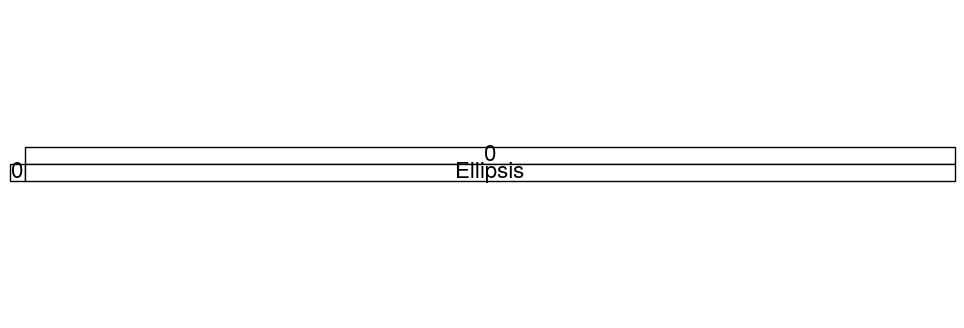